# Fourier transforms with windowing

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import fft

import matplotlib as mpl
mpl.rc('font', size=14)
mpl.rc('figure',figsize=(12,10))

In [34]:
# Given:

f_s = 100.0 # sampling frequency (Hz)
T = 3.0 # total actual sample time (s)

g = np.loadtxt('../../data/FFT_Example_data_with_window.txt')
# add noise
for i in range(10):
    g += np.random.rand(g.shape[0])

In [35]:
# Calculate
N = f_s*T  #total actual number of data points
del_t = 1./f_s  #(s)
del_f = 1./T  #(Hz)
f_fold = f_s/2.  #folding frequency = max frequency of FFT (Hz)
N_freq = N/2.  #number of discrete frequencies

t = np.arange(0.0,T+del_t,del_t)  #time, t (s)

g += 1.2*np.sin(2*np.pi*10*t)

In [36]:
frequency = np.arange(0,f_fold,del_f)  #frequency (Hz)
G = fft.fft(g) # FFT 
Magnitude = np.abs(G)/(N/2.)  #|F|/(N/2)
Magnitude[0] = Magnitude[0]/2
len_loc, = Magnitude.shape
A = Magnitude[0:np.int(round(len_loc/2))]
Freq = frequency[0:np.int(round(len_loc/2))]

Text(0, 0.5, 'abs(F)')

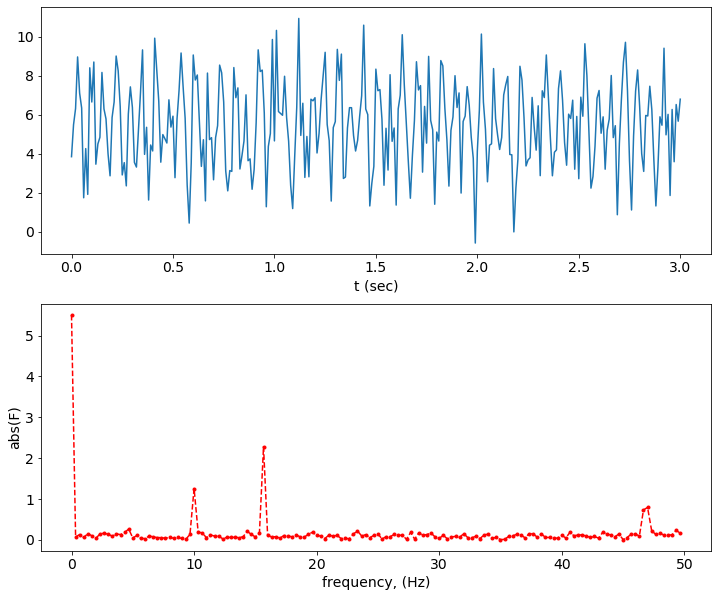

In [37]:
fig,ax = plt.subplots(2,1)
ax[0].plot(t,g)
ax[0].set_xlabel('t (sec)')
ax[1].set_ylabel('E (volts)')

ax[1].plot(Freq,A,'r--.')
# plot(frequency_2,Magnitude_Hann_2[:frequency_2.shape[0]], 'r-s')
ax[1].set_xlabel('frequency, (Hz)')
ax[1].set_ylabel('abs(F)')

In [38]:
# windowing

N_2 = int(2**np.fix(np.log2(N)))  #total useful number of data points
T_2 = N_2/f_s  #total useful sample time (s)
del_f_2 = 1/T_2  #(Hz)
N_freq_2 = N_2/2  #number of useful discrete frequencies

t_2 = np.arange(0.0,T_2,del_t)  #time, t (s)
frequency_2 = np.arange(0,f_fold,del_f_2)  #frequency (Hz)
len2, = t_2.shape


g = g[:len2] # crop only the relevant sampled signal (original is longer)

DC_2 = np.mean(g)  #DC = mean value of input signal (V) (average of all the useful data)
g_uncoupled_2 = g - DC_2  #uncoupled

# Hanning window
u_Hann_2 = 0.5*(1-np.cos(2*np.pi*t_2/T_2))

# multiply in the time domain or convolute in frequency domain
g_Hann_2 = g_uncoupled_2*u_Hann_2 

# FFT of the windowed time signal 
G_Hann_2 = fft.fft(g_Hann_2,N_2) 

# get out the amplitude, return DC
# Correct for the Hanning window amplitude |F|*sqrt(8/3)/(N/2)
Magnitude_Hann_2 = np.abs(G_Hann_2)*np.sqrt(8./3.)/(N_2/2) 

#(also divide the first one by 2, and add back the DC value)
Magnitude_Hann_2[0] = Magnitude_Hann_2[0]/2 + DC_2  

len_loc, = Magnitude_Hann_2.shape
A_2 = Magnitude_Hann_2[0:np.int(round(len_loc/2))]
Freq_2 = frequency_2[0:np.int(round(len_loc/2))]

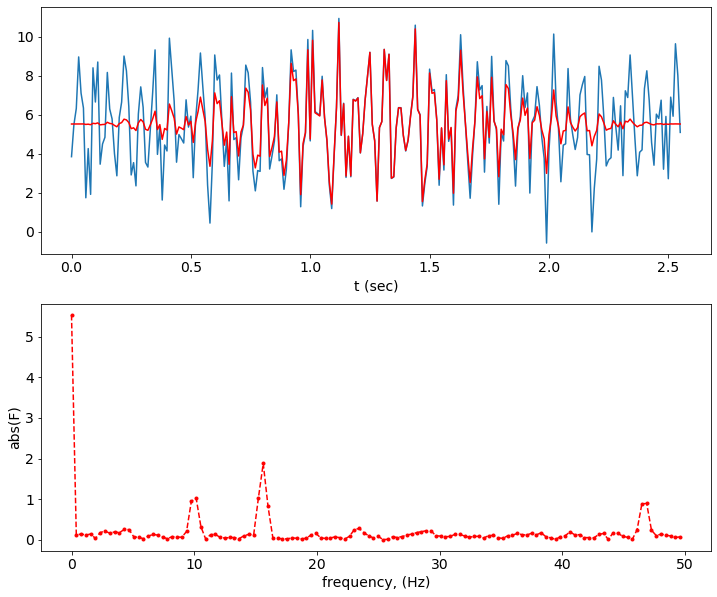

In [39]:
fig,ax = plt.subplots(2,1)
ax[0].plot(t_2,g)
ax[0].plot(t_2,g_Hann_2+DC_2,'r')
ax[0].set_xlabel('t (sec)')
ax[1].set_ylabel('E (volts)')

ax[1].plot(Freq_2,A_2,'r--.')
# plot(frequency_2,Magnitude_Hann_2[:frequency_2.shape[0]], 'r-s')
ax[1].set_xlabel('frequency, (Hz)')
ax[1].set_ylabel('abs(F)');

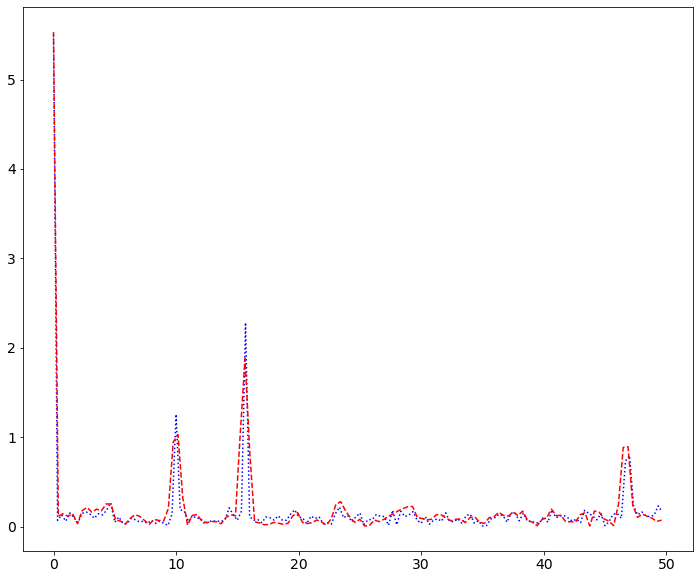

In [40]:
plt.plot(Freq,A,'b:',Freq_2,A_2,'r--')